<a href="https://colab.research.google.com/github/YungKing1224/Python-data-science/blob/main/logistic_regression(HR%20Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

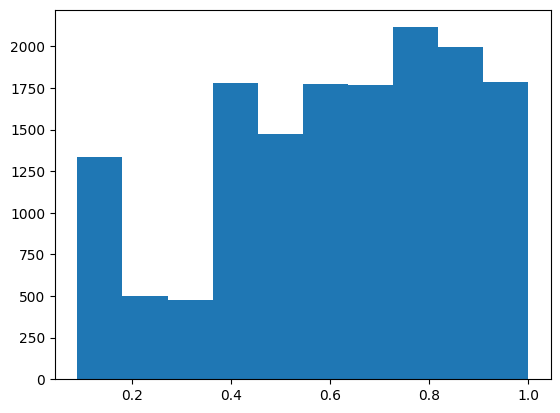

In [5]:
plt.hist(df['satisfaction_level'])

<Axes: xlabel='Department'>

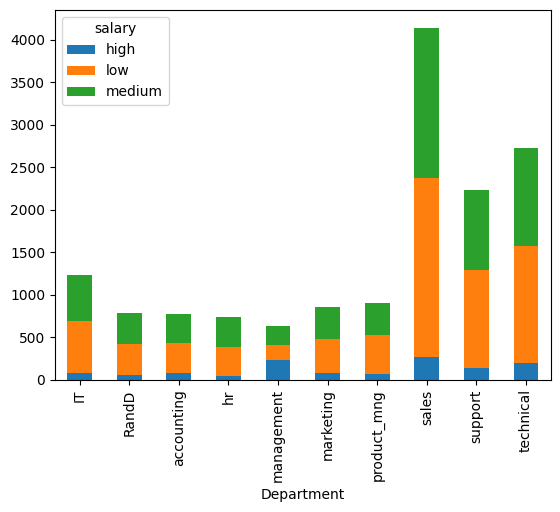

In [6]:
pd.crosstab(df['Department'], df['salary']).plot(kind='bar', stacked=True)

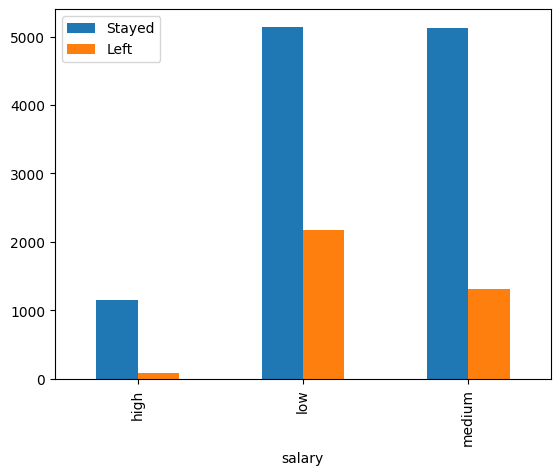

In [7]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.legend(['Stayed', 'Left'])

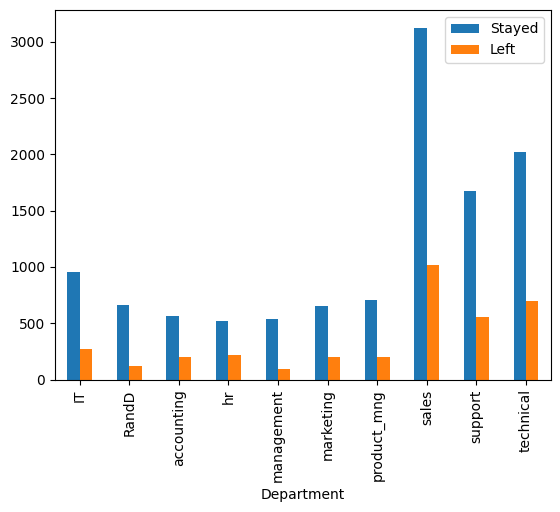

In [8]:
pd.crosstab(df['Department'], df['left']).plot(kind='bar')
plt.legend(['Stayed', 'Left'])

In [9]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [["low","medium","high"]],dtype=int)

df["salary"] = oe.fit_transform(df[["salary"]])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
x = df.drop(['left', 'last_evaluation', 'number_project', 'average_montly_hours', 'Work_accident', 'Department'], axis=1)
y = df['left']

In [13]:
x

,satisfaction_level,time_spend_company,promotion_last_5years,salary
0,0.38,3,0,0
1,0.80,6,0,1
2,0.11,4,0,1
3,0.72,5,0,0
4,0.37,3,0,0
...,...,...,...,...
14994,0.40,3,0,0
14995,0.37,3,0,0
14996,0.37,3,0,0
14997,0.11,4,0,0


In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0])

In [22]:
model.score(x_test, y_test)

0.7653333333333333